In [1]:
#importing Libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from wordcloud import WordCloud
%matplotlib inline

In [2]:
#reading data from csv file
#https://docs.python.org/3.4/howto/unicode.html
dataframe = pd.read_csv('../input/sms-spam-collection-dataset/spam.csv', encoding='latin-1')
dataframe.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Now drop "unnamed" columns and rename v1 and v2 to "label" and "message"

In [3]:
dataframe = dataframe.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
dataframe = dataframe.rename(columns = {'v1':'Label','v2':'Message'})

In [4]:
dataframe.head()

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
#stats
dataframe.describe()

,Label,Message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [6]:
dataframe['Label'] = dataframe['Label'].map({'ham': 0, 'spam': 1})
dataframe.head()

,Label,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
#Now let's create new feature "message length" and plot it to see if it's of any interest
dataframe['length'] = dataframe['Message'].apply(len)
dataframe.head()

,Label,Message,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [8]:
dataframe['length'].max()

910

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f610e855fd0>,
      dtype=object)

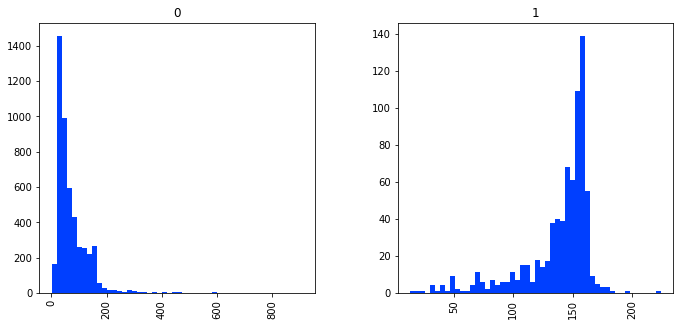

In [9]:
plt.style.use('seaborn-bright')
dataframe.hist(column='length', by='Label', bins=50,figsize=(11,5))

Looks like the lengthy is the message, more likely it is a spam. Let's not forget this

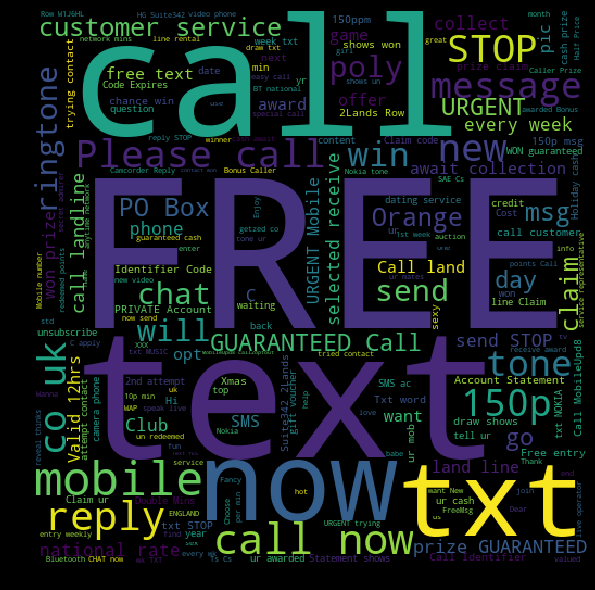

In [10]:
spam_words = ' '.join(list(dataframe[dataframe['Label'] == 1]['Message']))
spam_wc = WordCloud(width = 512,height = 512).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

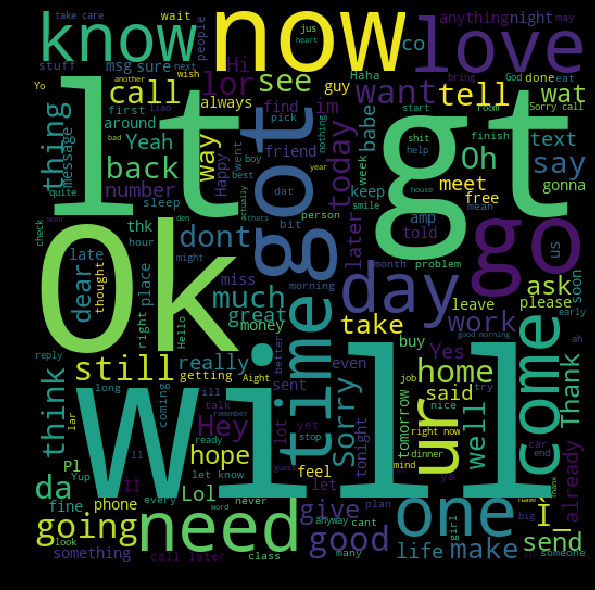

In [11]:
spam_words = ' '.join(list(dataframe[dataframe['Label'] == 0]['Message']))
spam_wc = WordCloud(width = 512,height = 512).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [12]:
#text precessing function
#https://stackoverflow.com/questions/34293875/how-to-remove-punctuation-marks-from-a-string-in-python-3-x-using-translate
def text_process(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    return " ".join(text)

In [13]:
#creating copy of dataframe and take message only
df = dataframe['Message'].copy()

In [14]:
df = df.apply(text_process)

In [15]:
vectorizer = TfidfVectorizer("english")

In [16]:
features = vectorizer.fit_transform(df)

In [17]:
#train-test-split
train_X, test_x, train_y, test_y = train_test_split(features, dataframe['Label'], test_size=0.3, random_state=111)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score

In [19]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier(n_neighbors=49)
mnb = MultinomialNB(alpha=0.2)
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=111)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=31, random_state=111)
abc = AdaBoostClassifier(n_estimators=62, random_state=111)
bc = BaggingClassifier(n_estimators=9, random_state=111)
etc = ExtraTreesClassifier(n_estimators=9, random_state=111)

In [20]:
clfs = {'SVC' : svc,'KN' : knc, 'NB': mnb, 'DT': dtc, 'LR': lrc, 'RF': rfc, 'AdaBoost': abc, 'BgC': bc, 'ETC': etc}

In [21]:
#function for classifier
def train_classifier(clf, train_X, train_y):    
    clf.fit(train_X, train_y)

In [22]:
#function for predictions
def predict_labels(clf, features):
    return (clf.predict(features))

In [23]:
pred_scores = []
for k,v in clfs.items():
    train_classifier(v, train_X, train_y)
    pred = predict_labels(v,test_x)
    pred_scores.append((k, [accuracy_score(test_y,pred)]))

In [24]:
df1 = pd.DataFrame.from_items(pred_scores,orient='index', columns=['Score'])
df1

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  """Entry point for launching an IPython kernel.


,Score
SVC,0.978469
KN,0.924641
NB,0.984450
DT,0.958732
LR,0.943182
RF,0.970096
AdaBoost,0.967105
BgC,0.967105
ETC,0.977273


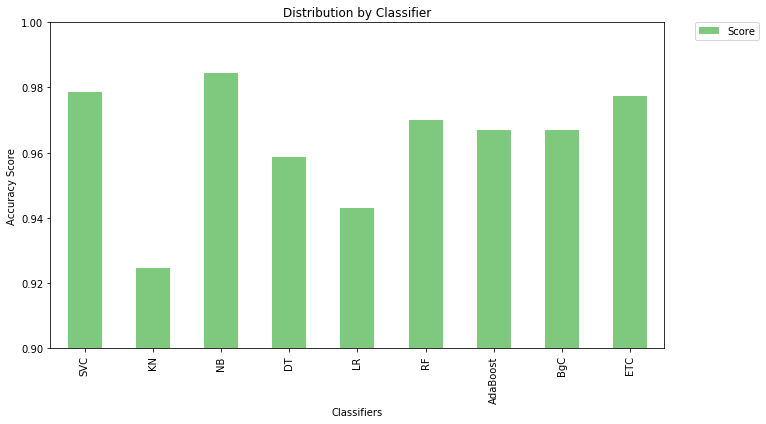

In [25]:
df1.plot(kind='bar', ylim=(0.9,1.0), figsize=(11,6), align='center', colormap="Accent")
plt.xticks(np.arange(9), df1.index)
plt.xlabel('Classifiers')
plt.ylabel('Accuracy Score')
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ensemble classifiers are not doing as good as expected

In [26]:
#stemmer function
def stemmer (text):
    text = text.split()
    words = ""
    for i in text:
            stemmer = SnowballStemmer("english")
            words += (stemmer.stem(i))+" "
    return words

In [27]:
df = df.apply(stemmer)

In [28]:
features = vectorizer.fit_transform(df)

In [29]:
train_X, test_X, train_y, test_y = train_test_split(features, dataframe['Label'], test_size=0.3, random_state=111)

In [30]:
pred_scores = []
for k,v in clfs.items():
    train_classifier(v, train_X, train_y)
    pred = predict_labels(v,test_X)
    pred_scores.append((k, [accuracy_score(test_y,pred)]))

In [31]:
df2 = pd.DataFrame.from_items(pred_scores,orient='index', columns=['Score2'])
df1 = pd.concat([df1,df2],axis=1)
df1

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  """Entry point for launching an IPython kernel.


,Score,Score2
SVC,0.978469,0.978469
KN,0.924641,0.928230
NB,0.984450,0.985048
DT,0.958732,0.959928
LR,0.943182,0.946770
RF,0.970096,0.974880
AdaBoost,0.967105,0.970096
BgC,0.967105,0.968900
ETC,0.977273,0.977871


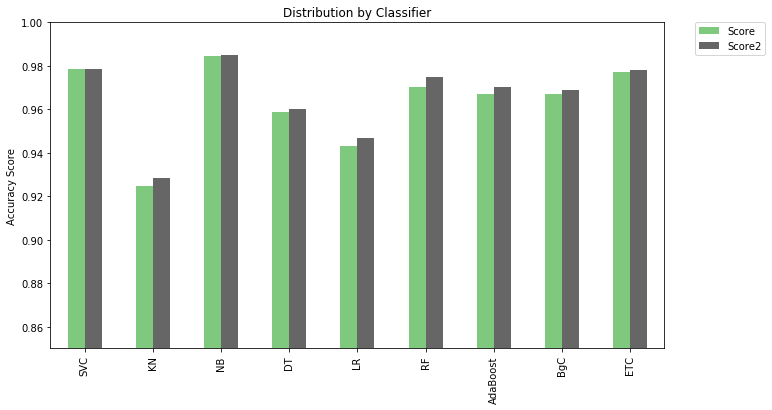

In [32]:
df1.plot(kind='bar', ylim=(0.85,1.0), figsize=(11,6), align='center', colormap="Accent")
plt.xticks(np.arange(9), df1.index)
plt.ylabel('Accuracy Score')
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [33]:
#append message length in dataset
#https://docs.scipy.org/doc/numpy/reference/generated/numpy.hstack.html
lengthframe = dataframe['length'].as_matrix()
newfeat = np.hstack((features.todense(),lengthframe[:, None]))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [34]:
train_X, test_X, train_y, test_y = train_test_split(newfeat, dataframe['Label'], test_size=0.3, random_state=111)

In [35]:
pred_scores = []
for k,v in clfs.items():
    train_classifier(v, train_X, train_y)
    pred = predict_labels(v,test_X)
    pred_scores.append((k, [accuracy_score(test_y,pred)]))

In [36]:
df3 = pd.DataFrame.from_items(pred_scores,orient='index', columns=['Score3'])
df1 = pd.concat([df1,df3],axis=1)
df1

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  """Entry point for launching an IPython kernel.


,Score,Score2,Score3
SVC,0.978469,0.978469,0.861244
KN,0.924641,0.928230,0.880383
NB,0.984450,0.985048,0.982656
DT,0.958732,0.959928,0.957536
LR,0.943182,0.946770,0.954545
RF,0.970096,0.974880,0.975478
AdaBoost,0.967105,0.970096,0.961722
BgC,0.967105,0.968900,0.962321
ETC,0.977273,0.977871,0.975478


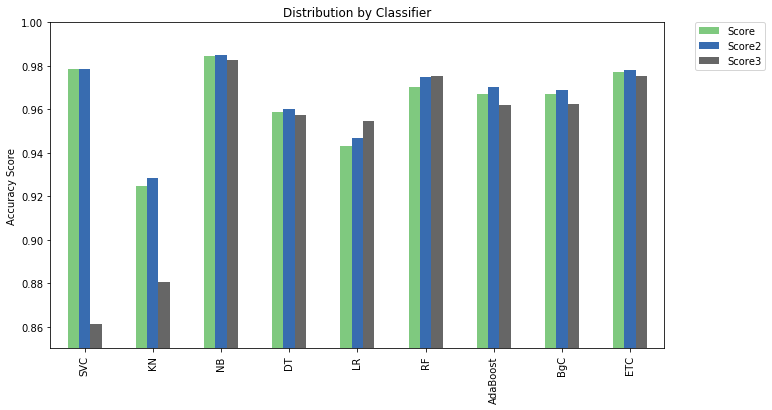

In [37]:
df1.plot(kind='bar', ylim=(0.85,1.0), figsize=(11,6), align='center', colormap="Accent")
plt.xticks(np.arange(9), df1.index)
plt.ylabel('Accuracy Score')
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

This time everyone are doing a little bit worse, except for LinearRegression and RandomForest. But the winner is still MultinominalNaiveBayes.

In [38]:
from sklearn.ensemble import VotingClassifier

In [39]:
eclf = VotingClassifier(estimators=[('BgC', bc), ('ETC', etc), ('RF', rfc), ('Ada', abc)], voting='soft')

In [40]:
eclf.fit(train_X,train_y)

VotingClassifier(estimators=[('BgC',
                              BaggingClassifier(base_estimator=None,
                                                bootstrap=True,
                                                bootstrap_features=False,
                                                max_features=1.0,
                                                max_samples=1.0, n_estimators=9,
                                                n_jobs=None, oob_score=False,
                                                random_state=111, verbose=0,
                                                warm_start=False)),
                             ('ETC',
                              ExtraTreesClassifier(bootstrap=False,
                                                   class_weight=None,
                                                   criterion='gini',
                                                   max_depth=None,
                                                   max_features='auto',...


In [41]:
pred = eclf.predict(test_X)

In [42]:
print(accuracy_score(test_y,pred))

0.979066985645933
